## Variations Among Repeated Transcriptions
A collection of grocery receipts were transcribed by hand by three different students. We explore statistical discrepancies in their results and discover the following key points: 
- Participants missing from a data set
- Small overall variation in grocery count
- Large variation in grocery count for certain participants
- Consistent variation in number of receipts

In [3]:
import datetime

import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd

%matplotlib inline

In [4]:
%%time
DATA_PATH = '../Data/'
FILE_NAME = 'Max, Samantha, Maria data.xlsx'
COLS = [0, 1, 2]  # ID, Session, Receipt

df_max = pd.read_excel(DATA_PATH + FILE_NAME, sheet_name='Max', usecols=COLS)
df_mar = pd.read_excel(DATA_PATH + FILE_NAME, sheet_name='Maria', usecols=COLS)
df_sam = pd.read_excel(DATA_PATH + FILE_NAME, sheet_name='Samantha', usecols=COLS)

dfs = [df_max, df_mar, df_sam]

C:\Users\josep\Documents\Projects\ALab\CookiesAndCognition\DataCleaning\envs\lib\site-packages\openpyxl\worksheet\_reader.py:211: UserWarning: Cell D2858 is marked as a date but the serial value 6684137 is outside the limits for dates. The cell will be treated as an error.
  warn(msg)


CPU times: total: 1.81 s
Wall time: 1.85 s


In [5]:
column_names = ['ID', 'Session', 'Receipt']
for df in dfs:
    df.columns = column_names

Three students were each assigned a collection of participants to transcribe, including a group of participants assigned to all three, which allows for estimates of transcription error rates.

In [6]:
ids_assigned_all = {121, 114, 137, 153, 141, 127, 130, 135, 148, 158}
ids_assigned_max = {129, 136, 144, 147, 151, 156, 160, 112, 117, 120} | ids_assigned_all
ids_assigned_mar = {128, 134, 143, 146, 150, 154, 159, 110, 115, 119} | ids_assigned_all
ids_assigned_sam = {131, 139, 145, 149, 152, 157, 162, 113, 118, 126} | ids_assigned_all

In [7]:
def make_venn(data, names):
    """Creates a Venn diagram from a list of 3 data sets and a list of their names."""
    plt.figure(figsize=(11, 11))
    v = venn3([data[0], data[1], data[2]], (names[0], names[1], names[2]))

    v.get_label_by_id('100').set_text('\n'.join(str(s) for s in (data[0] - data[1] - data[2])))
    v.get_label_by_id('110').set_text('\n'.join(str(s) for s in (data[0] & data[1] - data[2])))
    v.get_label_by_id('010').set_text('\n'.join(str(s) for s in (data[1] - data[0] - data[2])))
    v.get_label_by_id('101').set_text('\n'.join(str(s) for s in (data[0] & data[2] - data[1])))
    v.get_label_by_id('111').set_text('\n'.join(str(s) for s in (data[0] & data[1] & data[2])))
    v.get_label_by_id('011').set_text('\n'.join(str(s) for s in (data[1] & data[2] - data[0])))
    v.get_label_by_id('001').set_text('\n'.join(str(s) for s in (data[2] - data[0] - data[1])))

    # plt.savefig('../Output/id_venn_diagram.png')

### Participant Distribution as Designed

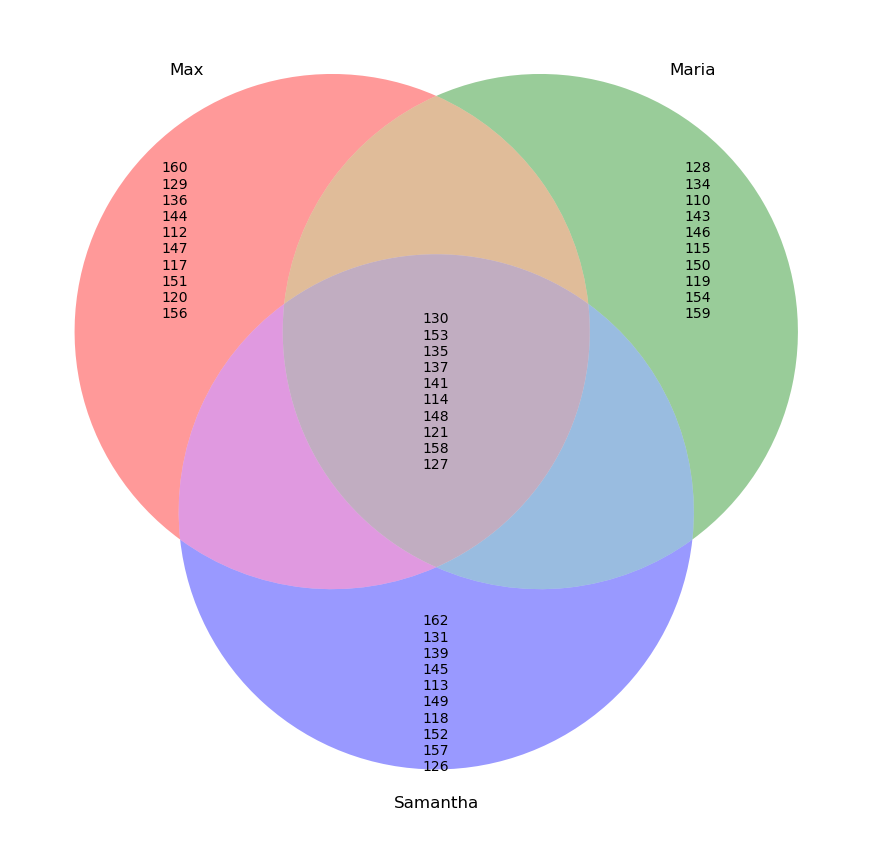

In [8]:
make_venn([ids_assigned_max, ids_assigned_mar, ids_assigned_sam], ['Max', 'Maria', 'Samantha'])

### Participant Distribution Results

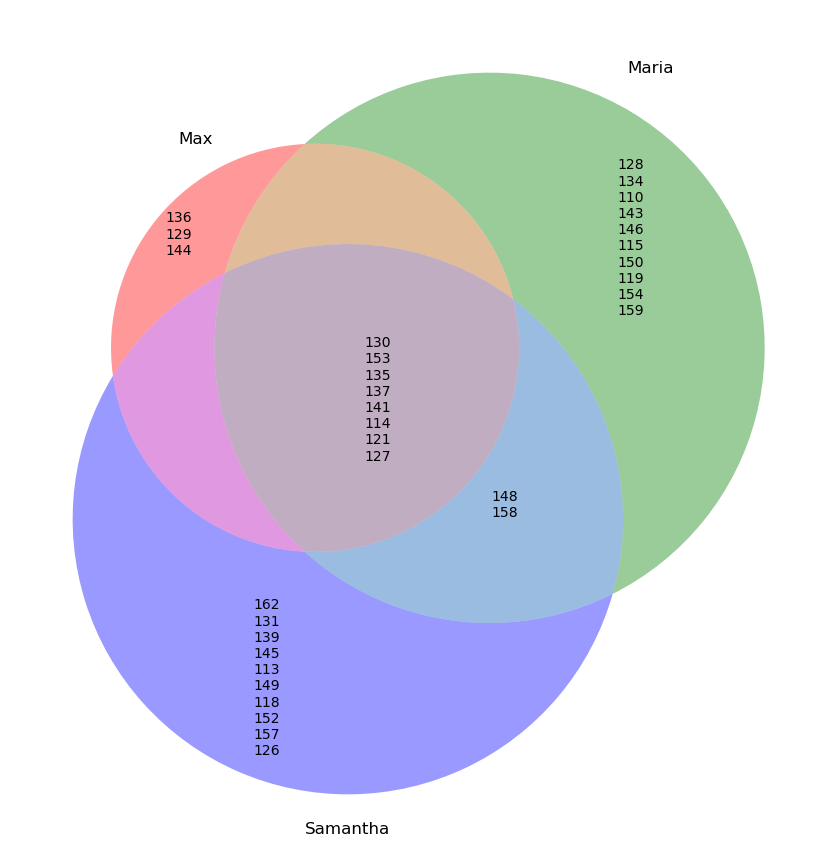

In [9]:
make_venn([set(df_max.ID.unique()), set(df_mar.ID.unique()), set(df_sam.ID.unique())], ['Max', 'Maria', 'Samantha'])

In [10]:
print(f"Transcription data for {ids_assigned_max - set(df_max.ID.unique())} is missing from Max's data set.")

Transcription data for {160, 112, 147, 148, 117, 151, 120, 156, 158} is missing from Max's data set.


Instead of one shared data set, we have two.

In [11]:
ids_all_three = set.intersection(set(df_max.ID.unique()), set(df_mar.ID.unique()), set(df_sam.ID.unique()))
ids_only_two = set.intersection(set(df_mar.ID.unique()), set(df_sam.ID.unique()) - set(df_max.ID.unique()))

print(f"{ids_all_three} is transcribed by all three.")
print(f"{ids_only_two} is transcribed only by Maria and Samantha.")

{130, 153, 135, 137, 141, 114, 121, 127} is transcribed by all three.
{148, 158} is transcribed only by Maria and Samantha.


In [12]:
dfs_all_three = [df[df.ID.isin(ids_all_three)].reset_index(drop=True) for df in dfs]
dfs_only_two = [df[df.ID.isin(ids_only_two)].reset_index(drop=True) for df in [df_mar, df_sam]]

### All Three
Examination of the participants repeated by all three transcribers.

In [13]:
for df in dfs_all_three:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       1540 non-null   int64  
 1   Session  1540 non-null   int64  
 2   Receipt  936 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 36.2 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       1573 non-null   int64  
 1   Session  1573 non-null   int64  
 2   Receipt  947 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 37.0 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       1552 non-null   int64 
 1   Session  1552 non-null   int64 
 2   Receipt  938 non-null    object
dty

There is a small variation of ~1% in the number of data points overall.

When the data is grouped by participant ID, we see the variation is not equally distributed.

In [14]:
items_all_three = pd.concat([df.groupby(by=['ID', 'Session']).size() for df in dfs_all_three], axis=1).groupby(level=0).sum()
display(items_all_three)

,0,1,2
ID,,,
114,150.0,151,150.0
121,262.0,257,264.0
127,203.0,194,203.0
130,229.0,297,229.0
135,229.0,229,213.0
137,140.0,139,141.0
141,142.0,120,139.0
153,185.0,186,213.0


There is a larger than average variation in participants 130, 141, and 153.

We also find some variation in number of receipts transcribed per participant.

In [15]:
receipts_all_three = (dfs_all_three[0].groupby(by=['ID', 'Session']).nunique()
                      .join(dfs_all_three[1].groupby(by=['ID', 'Session']).nunique(), rsuffix='1')
                      .join(dfs_all_three[2].groupby(by=['ID', 'Session']).nunique(), rsuffix='2')).groupby(level=0).sum()
display(receipts_all_three)

,Receipt,Receipt1,Receipt2
ID,,,
114,14,14,14
121,0,0,0
127,12,10,13
130,20,20,20
135,16,16,15
137,4,5,4
141,2,0,2
153,8,8,9


In 5 of the 8 participants there is disagreement among the data sets as to how many receipts were submitted. There are many null values in Receipt.

### Only Two
We repeat the analysis above for the participants transcribed by Maria and Samantha only.

In [16]:
for df in dfs_only_two:
    print(df.info())
    print()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       314 non-null    int64  
 1   Session  314 non-null    int64  
 2   Receipt  47 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 7.5 KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID       318 non-null    int64 
 1   Session  318 non-null    int64 
 2   Receipt  49 non-null     object
dtypes: int64(2), object(1)
memory usage: 7.6+ KB
None



There is a small variation of ~1% in the number of data points overall.

In [17]:
items_only_two = pd.concat([df.groupby(by=['ID', 'Session']).size() for df in dfs_only_two], axis=1).groupby(level=0).sum()
display(items_only_two)

,0,1
ID,,
148,303,305
158,11,13


Participant 158 submitted little data.

The transcription for these participants consistently showed a large amount of null receipt numbers.

In [18]:
receipts_only_two = (dfs_only_two[0].groupby(by=['ID', 'Session']).nunique()
                      .join(dfs_only_two[1].groupby(by=['ID', 'Session']).nunique(), rsuffix='1'))
display(receipts_only_two)

Receipt  Receipt1
ID  Session                   
148 1              0         0
    2              2         2
    3              0         0
    4              0         0
    5              0         0
    6              0         0
158 1              0         0

The number of receipts transcribed is consistent between the two data sets.